In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
## 합성곱 신경망 만들기

model = keras.Sequential()

Metal device set to: Apple M1 Pro


2023-09-01 15:58:12.290899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-01 15:58:12.291005: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='leaky_relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='leaky_relu', padding='same', input_shape=(28, 28, 1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='leaky_relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='leaky_relu'))
model.add(keras.layers.Dense(100, activation='leaky_relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
### 모델 컴파일과 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history= model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20


2023-09-01 15:58:12.684711: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-01 15:58:12.907534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1498/1500 [============================>.] - ETA: 0s - loss: 0.3923 - accuracy: 0.8590

2023-09-01 15:58:35.437961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 25s 16ms/step - loss: 0.3923 - accuracy: 0.8589 - val_loss: 0.2885 - val_accuracy: 0.8908
Epoch 2/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2585 - accuracy: 0.9059 - val_loss: 0.2570 - val_accuracy: 0.9025
Epoch 3/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2166 - accuracy: 0.9205 - val_loss: 0.2982 - val_accuracy: 0.8969
Epoch 4/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1922 - accuracy: 0.9290 - val_loss: 0.2404 - val_accuracy: 0.9135
Epoch 5/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1696 - accuracy: 0.9381 - val_loss: 0.2651 - val_accuracy: 0.9122
Epoch 6/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1465 - accuracy: 0.9450 - val_loss: 0.2464 - val_accuracy: 0.9208
Epoch 7/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.1338 - accuracy: 0.9521 - val_loss: 0.2626 - val_accura

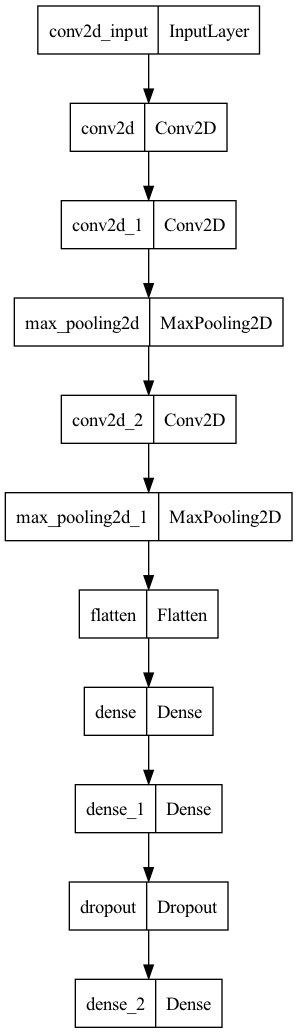

In [11]:
keras.utils.plot_model(model)

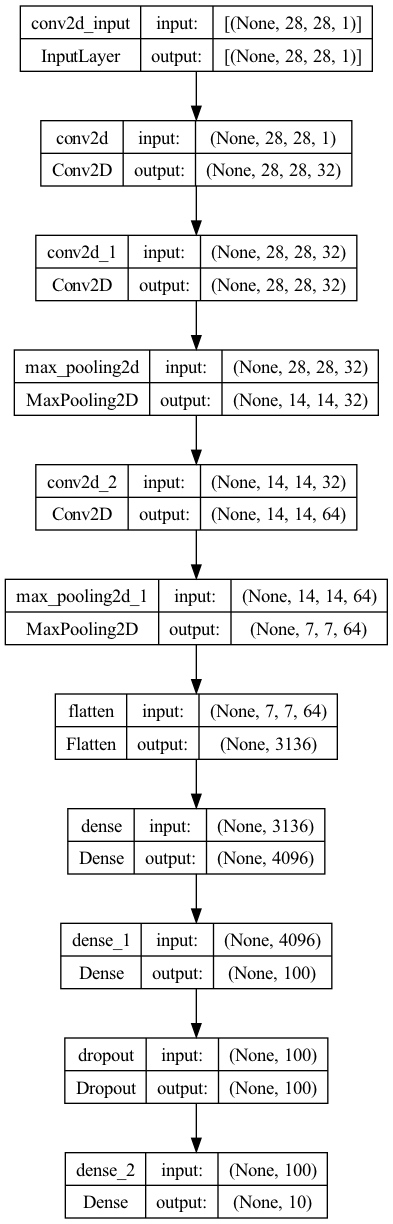

In [12]:
keras.utils.plot_model(model, show_shapes=True)

In [13]:
import matplotlib.pyplot as plt

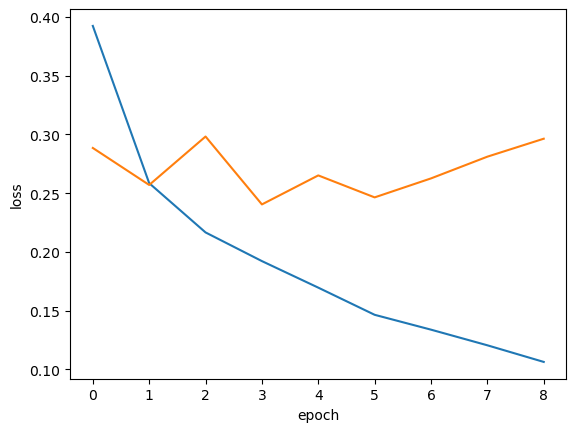

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2404 - accuracy: 0.9135


[0.24041648209095, 0.9135000109672546]

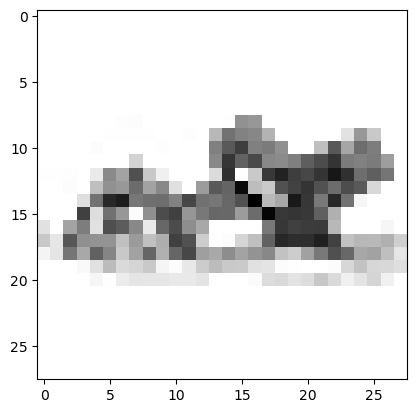

In [16]:
plt.imshow(val_scaled[9].reshape(28, 28), cmap='gray_r')
plt.show()

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 107ms/step
[[2.4556504e-30 2.0171538e-36 4.0577485e-35 5.8577374e-33 2.5123262e-34
  8.2095638e-32 3.4166427e-34 1.1089967e-35 1.0000000e+00 4.0464207e-34]]


2023-09-01 16:01:53.236437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


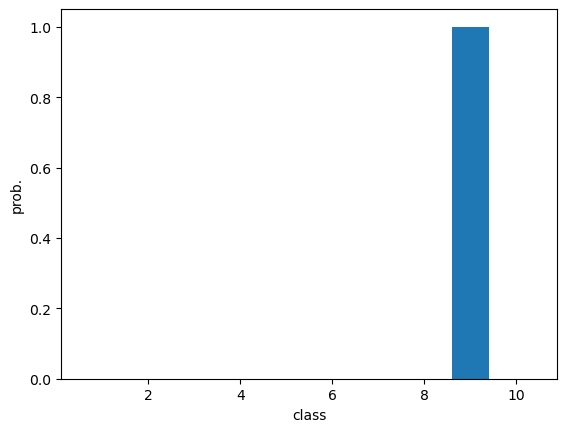

In [18]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [20]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [21]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [22]:
model.evaluate(test_scaled, test_target)

 15/313 [>.............................] - ETA: 2s - loss: 0.2493 - accuracy: 0.9146

2023-09-01 16:01:53.470403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.2615 - accuracy: 0.9060


[0.26150423288345337, 0.906000018119812]